In [46]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
titanic_data = pd.read_csv('D:\Костя\Downloads\Tit.csv') 
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
#сводка по пропущенным данным
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#данные для обучения (датафрейм с фичами)
X = titanic_data.drop(columns = ['PassengerId', 'Name', 'Survived', 'Cabin', 'Ticket'])
#переменная, которую хотим предсказывать
Y = titanic_data.Survived
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [6]:
#В деревьях решений все переменные должны быть числовые
X = pd.get_dummies(X)
#и не должно быть пропущенных значаний (NaN), но в Age они есть
X = X.fillna({'Age': X.Age.median()})
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [43]:
#сосздаем дерево
clf = DecisionTreeClassifier(criterion  = 'entropy', max_depth = 3) 
#обучаем
clf.fit(X, Y)
#ноооо, сейчас оно переучилось, т.е. нашло не общие закономерности, а закономерности, присущие конкретному датасету
#Потому что разросталось (сплитилось) до того момента поко не дойдет до 0-й энтропии, т.е не найдет ВСЕ КОНКРЕТНЫЕ закономерности
#Чаще всего нам не нужно добиться 100% классификации, т.к. у данных нет 100% точности, нужно лищь выявить общое закономерности

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [20]:
#введем в процесс обучения модели статию, 
#когда мы обучаем её на одном наборе данных
#а тестируем на другом и сравниваем ответы

#разбиваем исходный набор данных
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5)

In [32]:
clf.fit(X_train, Y_train)
#Точность ответов на данных, которые модель видела
#97%
clf.score(X_train, Y_train)

0.9842696629213483

In [33]:
#Точность ответов на данных, которые модель не видела
#уже 75%
clf.score(X_test, Y_test)

0.7533632286995515

In [44]:
#Ограничим глубину дерева в параметрах DecisionTreeClassifier
#задав max_depth = 3
clf.fit(X_train, Y_train)
#Точность ответов на данных, которые модель видела снизилась
#83%
clf.score(X_train, Y_train)

0.8314606741573034

In [45]:
#Но точность ответов на данных, которые модель не видела, возросла
#80% 
clf.score(X_test, Y_test)

0.804932735426009

In [ ]:
#Ноооо, подбирая наилучшие параметры модели на тестовом датасете, мы опять её переучаем
#Т.к. подобранные параметры будут опять соответсвовать только этому конкретному датасету

In [ ]:
#сплитим датасет на трейниг дата и тест дата
#трейнинг дата сплитим на несколько кусочков
#обучаемся на всех кусочках кроме первого, предскахываем исход первого, считаем точность 
#обучаемся на всех, кроме второго, предсказываем второй и т.д
#это называется кросс валидация

In [48]:
#кросс валидация
clf = DecisionTreeClassifier(criterion  = 'entropy', max_depth = 3) 
#обучаем
arr_score = cross_val_score(clf, X_train, Y_train, cv = 5) #cv - количество кусочков на которые разбивается трэйн сет 
arr_score.mean()

0.7842696629213484

In [133]:
#подберем оптимальный параметр глубины
max_score, opt_depth = 0, 0
for depth in range(1, 20):
    clf = DecisionTreeClassifier(criterion  = 'entropy', max_depth = depth)
    score_mean = cross_val_score(clf, X_train, Y_train, cv = 5).mean()
    if score_mean > max_score:
        max_score = score_mean
        opt_depth = depth
best_clf_first = DecisionTreeClassifier(criterion  = 'entropy', max_depth = opt_depth)
best_clf_first.fit(X_train, Y_train)
print(best_clf_first.score(X_test, Y_test))

0.7713004484304933


In [134]:
#подбор оптимальных параметров с помощью специализированной библиотеки
#по умолчанию подбор идет по метрике accuracy (score)
#np.random.seed(0)
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier()
parameters = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}
grid_search_cv_clf = GridSearchCV(clf, parameters, cv = 5)
grid_search_cv_clf.fit(X_train, Y_train)
grid_search_cv_clf.best_params_
best_clf_second = grid_search_cv_clf.best_estimator_
best_clf_second.score(X_test, Y_test)

0.7914798206278026

In [155]:
from sklearn.metrics import precision_score, recall_score
print('precision: ', precision_score(Y_test, best_clf_second.predict(X_test)))
print('recall: ', recall_score(Y_test, best_clf_second.predict(X_test)))

precision:  0.7070063694267515
recall:  0.7025316455696202


In [158]:
y_predict_prob = best_clf_second.predict_proba(X_test)
y_predict_prob
#[<вероятность богибания>, <вероятность выживания>]
#если вероятность погибания не 0 - человек относится к классу погибших
#но это не всегда так

array([[0.5       , 0.5       ],
       [0.91964286, 0.08035714],
       [0.        , 1.        ],
       [0.91964286, 0.08035714],
       [0.        , 1.        ],
       [0.72413793, 0.27586207],
       [1.        , 0.        ],
       [0.35483871, 0.64516129],
       [0.72413793, 0.27586207],
       [1.        , 0.        ],
       [0.72413793, 0.27586207],
       [0.        , 1.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.92307692, 0.07692308],
       [0.91964286, 0.08035714],
       [0.91964286, 0.08035714],
       [0.        , 1.        ],
       [0.91964286, 0.08035714],
       [0.09090909, 0.90909091],
       [0.09090909, 0.90909091],
       [0.91964286, 0.08035714],
       [0.35483871, 0.64516129],
       [0.72413793, 0.27586207],
       [1.        , 0.        ],
       [0.55555556, 0.44444444],
       [0.91964286, 0.08035714],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.96666667, 0.03333333],
       [0.

In [160]:
y_predict = best_clf_second.predict(X_test)
y_predict

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

<AxesSubplot:>

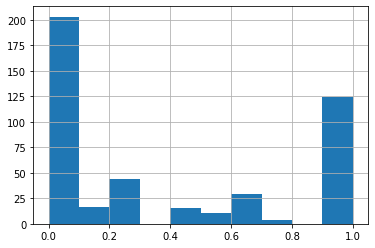

In [163]:
pd.Series(y_predict_prob[:, 1]).hist() #отберем только 2-ю колонку

In [176]:
#если предсказание по выживанию больше 0.6, 
#тогда человек выживает (класс 1), иначе погибает (класс 0)
y_predict = np.where(y_predict_prob[:, 1] > 0.4, 1, 0) 

In [177]:
print('precision: ', precision_score(Y_test, y_predict))
print('recall: ', recall_score(Y_test, y_predict))

precision:  0.6502732240437158
recall:  0.7531645569620253


Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.